In [ ]:
"""

This is the simulation for Schelling Model which state that 
People go and occupy houses at random in a place but over time they shift and make clusters of similar kind
-> We like to stay with people similar to us, It makes us happy and satisfied

Change the parameter of

L for loop (more the loop count, more the clustering and more nodes getting satisfied)

N for number of nodes in graph/grid (N*N) nodes in the grid

T for happiness/satisfied threshold (A node with T similar neibour will be satisfied)


"""

<Figure size 3000x3000 with 0 Axes>

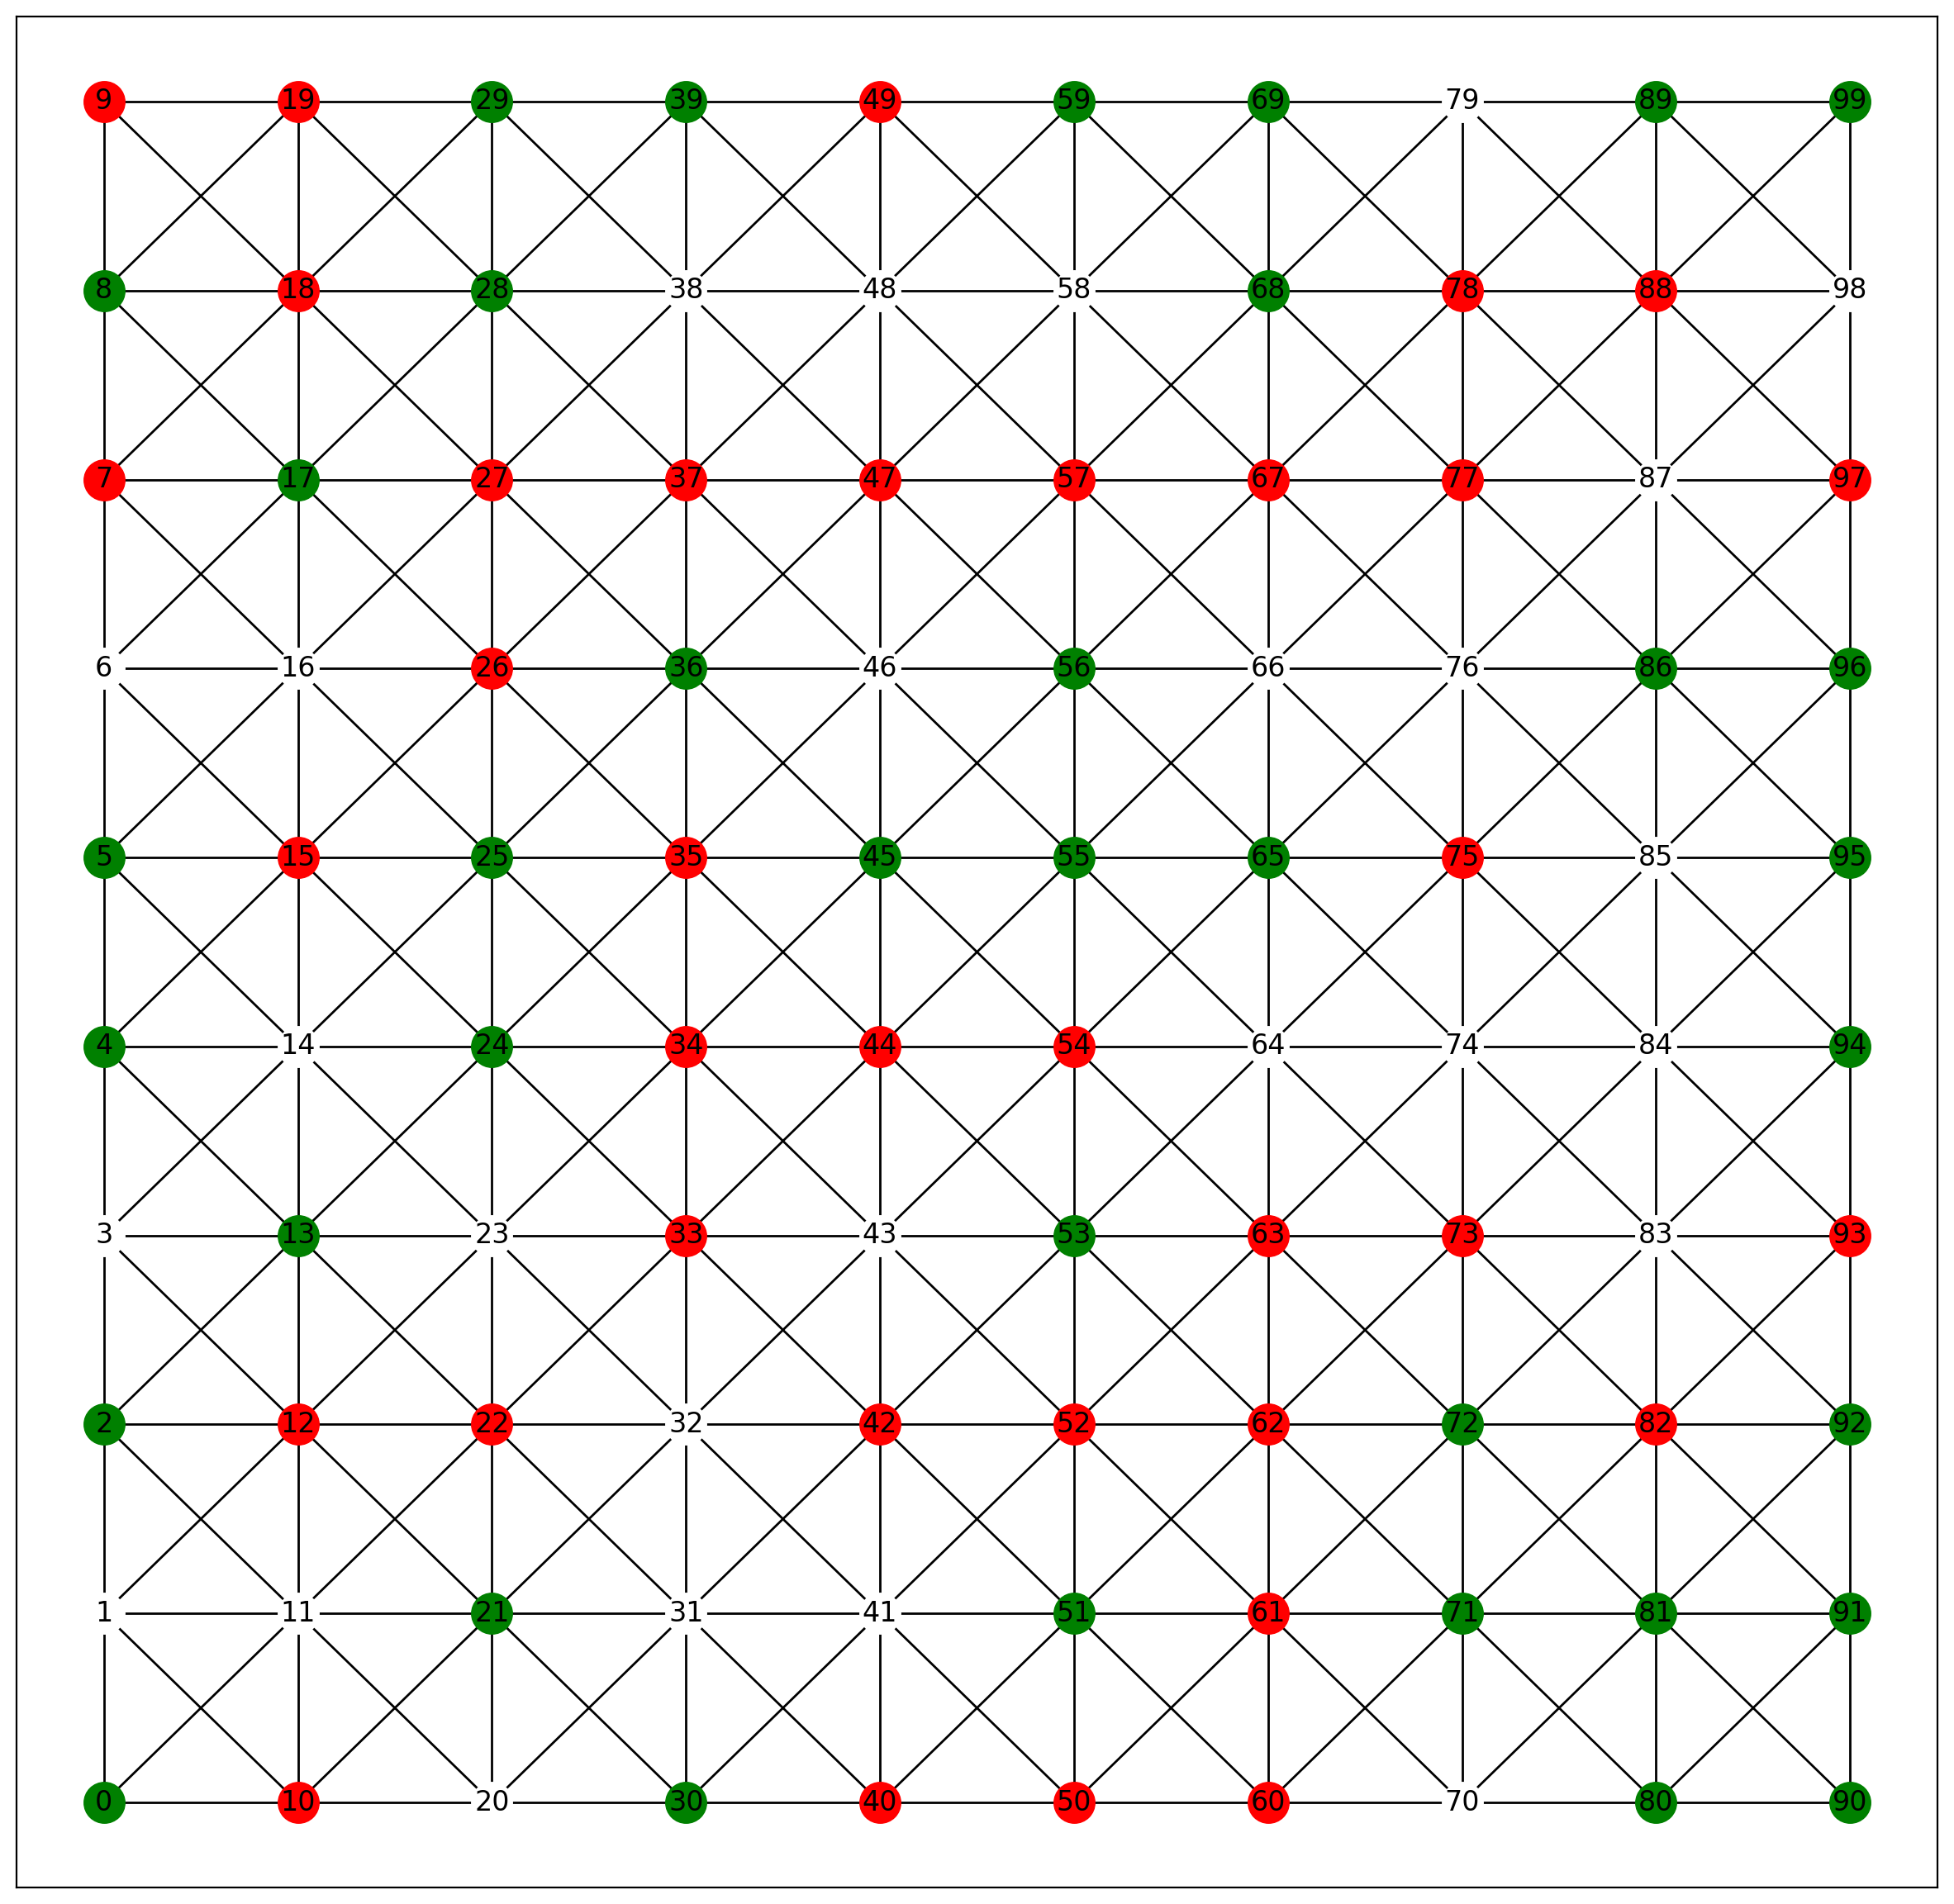

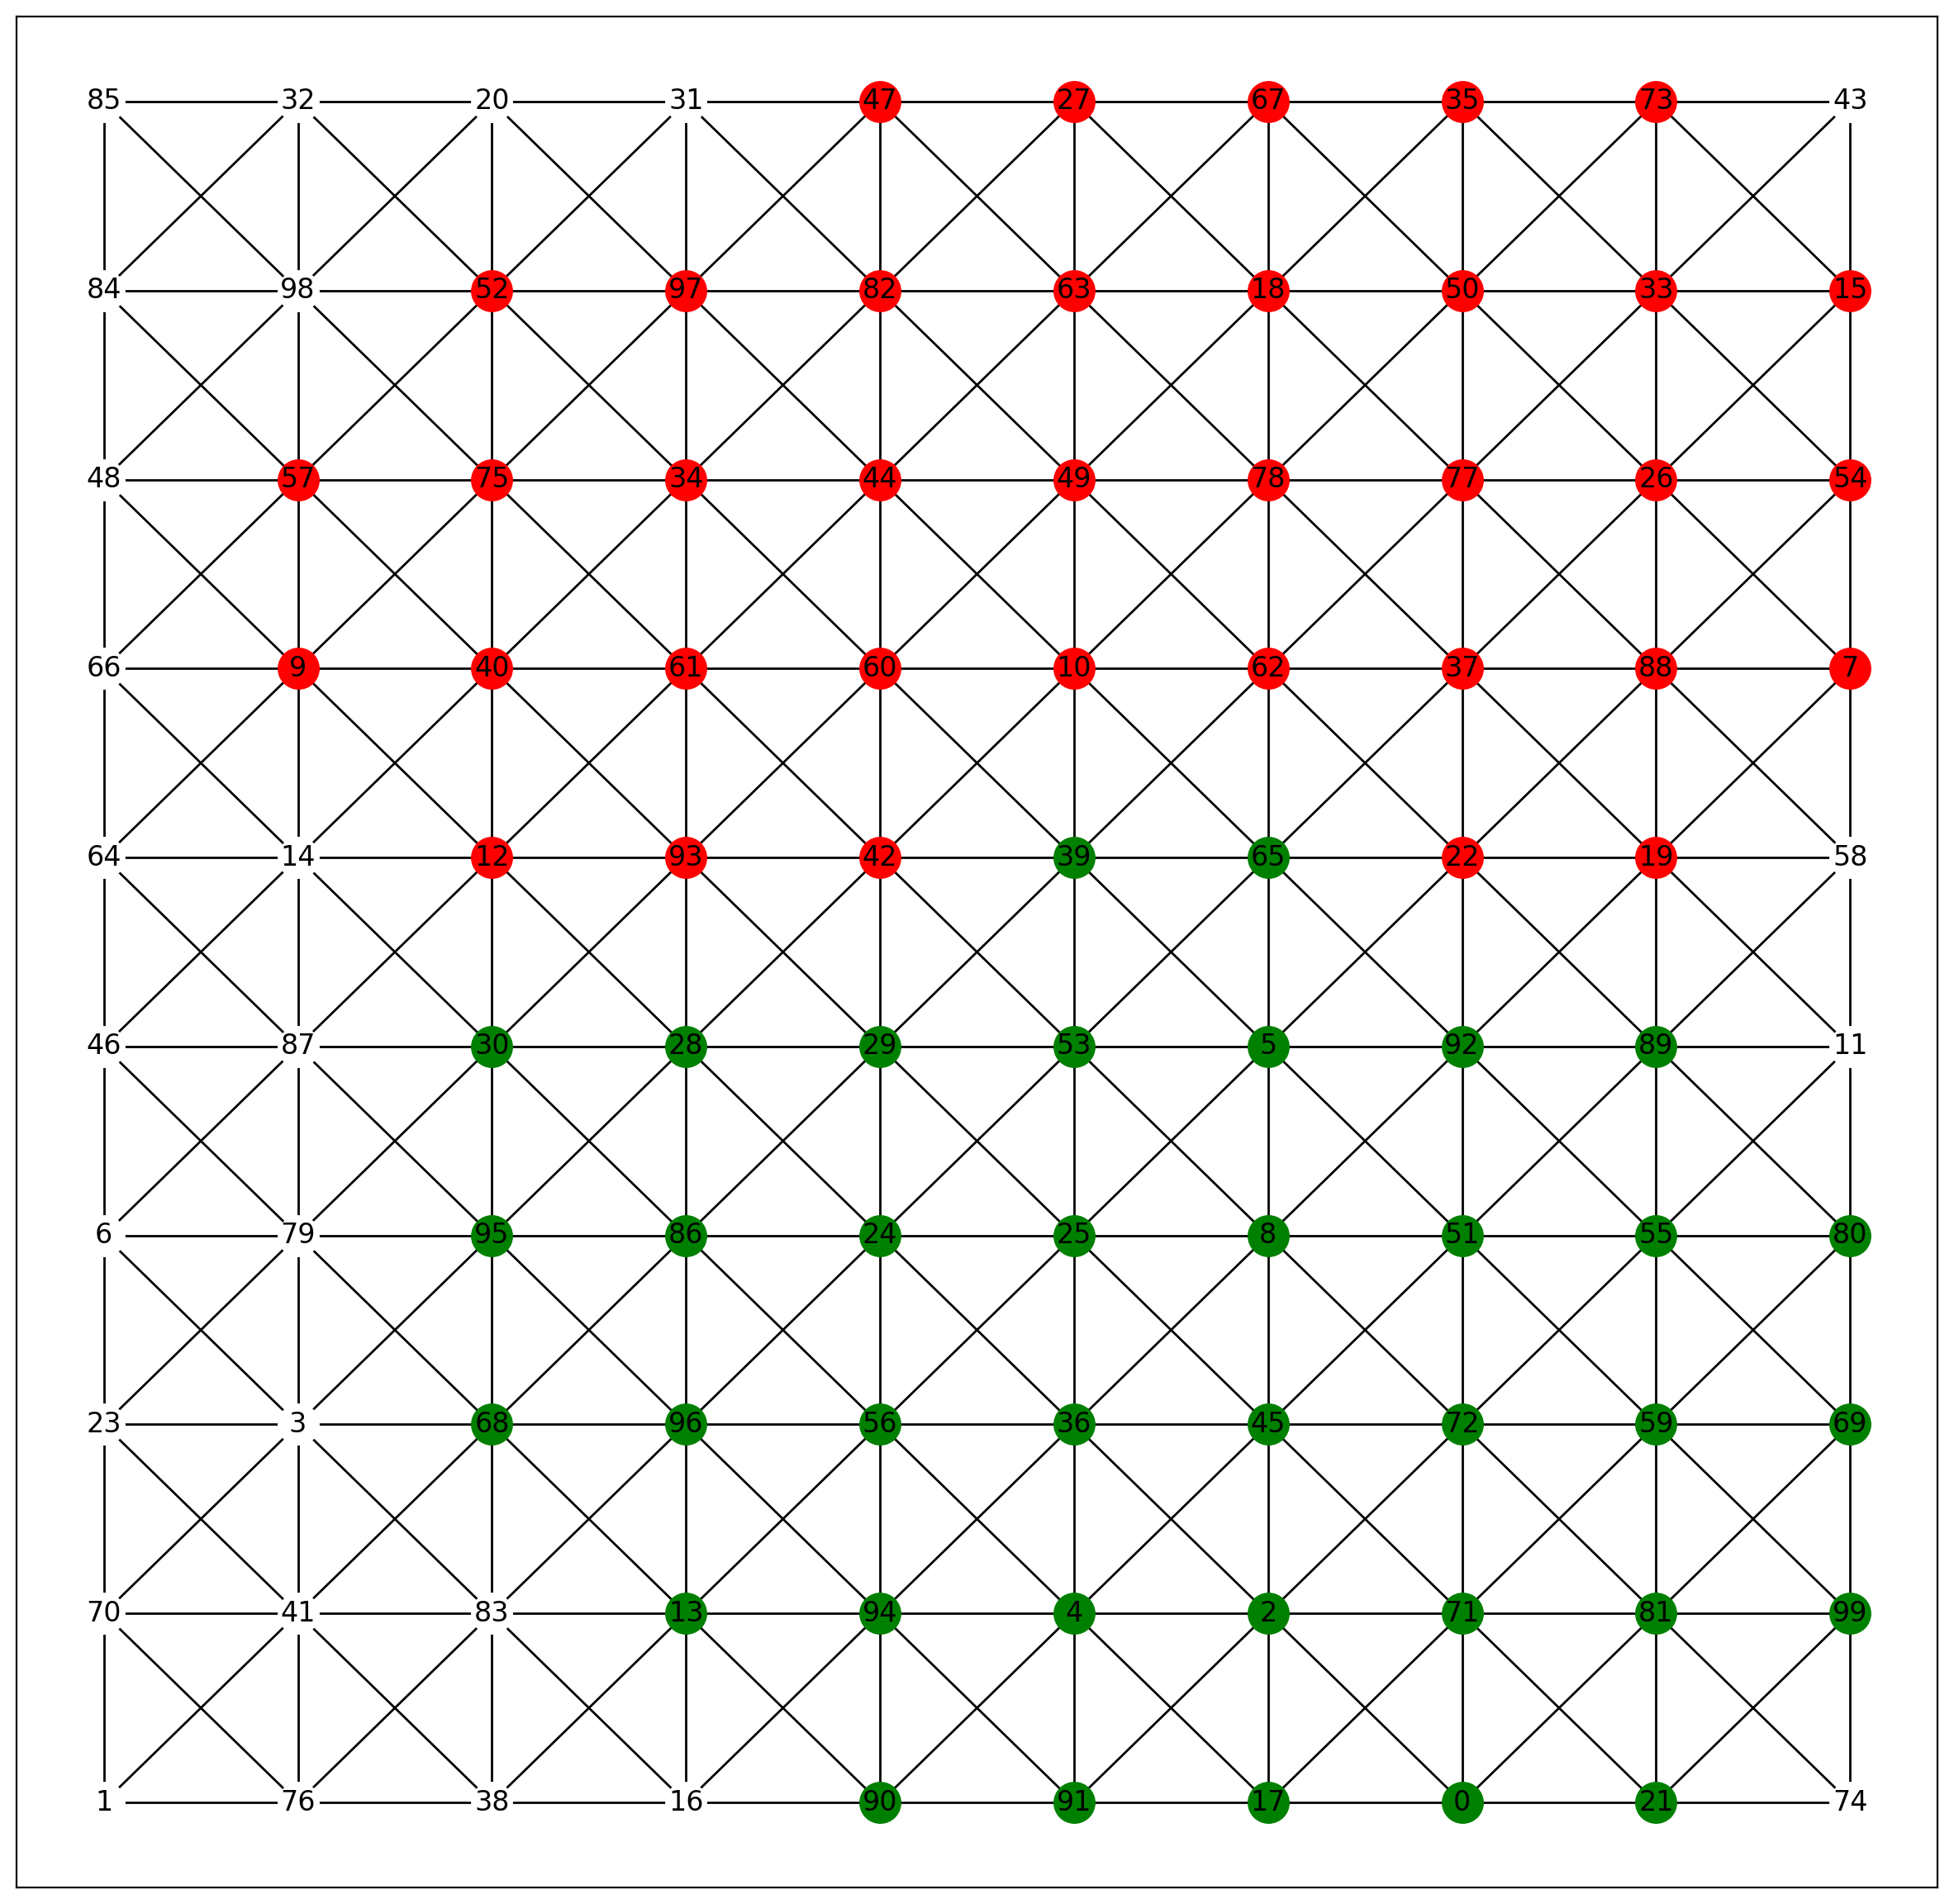

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(15,15),dpi=200)

#loop count for making the random shift of unsatisfied nodes 

L=5000

#total of N*N nodes in the grid
N=10

#threshold for happiness
T=3

#using networkx to create a grid
G=nx.grid_2d_graph(N,N)

pos =dict((n,n) for n in G.nodes())
labels=dict(((i,j),i*N+j) for i,j in G.nodes())


#giving different color to different type and display

def display_graph(G):
    plt.figure(figsize=(15,15),dpi=200)
    nodes_g=nx.draw_networkx_nodes(G,pos,node_color='green',nodelist=type1_node_list)
    nodes_r=nx.draw_networkx_nodes(G,pos,node_color='red',nodelist=type2_node_list)
    nodes_w=nx.draw_networkx_nodes(G,pos,node_color='white',nodelist=empty_node_list)
    
    nx.draw_networkx_edges(G,pos)
    nx.draw_networkx_labels(G,pos,labels=labels)
    plt.show()
    
    
#boundary node function defination


def get_boundary_nodes(G):
    boundary_nodes_list=[]
    for((u,v),d) in G.nodes(data=True):
        if u==0 or u==N-1 or v==0 or v==N-1:
            boundary_nodes_list.append((u,v))
            #print((u,v), "Appended")
    return boundary_nodes_list


#function to get inernal node's neighbour in a list
def get_internal_node_neighbour(u,v):
    neighbour=[(u,v+1),(u,v-1),(u-1,v),(u+1,v),(u-1,v+1),(u-1,v-1),(u+1,v+1),(u+1,v-1)]
    return neighbour

#function to get external node's neighbour in a list
def get_enternal_node_neighbour(u,v):
    #top left corner
    if(u==0 and v==N-1):
        return [(0,N-2),(1,N-1),(1,N-2)]
    #buttom left corner
    elif(u==0 and v==0):
        return [(0,1),(1,0),(1,1)]
    #buttom right corner
    elif(u==N-1 and v==0):
        return [(N-2,0),(N-1,1),(N-2,1)]
    #top right corner
    elif(u==N-1 and v==N-1):
        return [(N-2,N-1),(N-1,N-2),(N-2,N-2)]
    
    #entire left side
    elif(u==0):
        return [(u,v+1),(u,v-1),(u+1,v+1),(u+1,v),(u+1,v-1)]
    #entire top row
    elif(v==N-1):
        return [(u-1,v),(u,v-1),(u+1,v),(u-1,v-1),(u+1,v-1)]
    #entire buttom row
    elif(v==0):
        return [(u-1,v),(u+1,v),(u,v+1),(u-1,v+1),(u+1,v+1)]
    #entire right side
    elif(u==N-1):
        return [(u,v-1),(u-1,v),(u,v+1),(u-1,v+1),(u-1,v-1)]
        
    else:
        print("Some Error")
        return 0
    
    

    
    
#gives the list of nodes which are unsatisfied for the given thrashold
def get_unsatisfied_nodes_list(G,internal_nodes_list,boundary_nodes_list):
    unsatisfied_nodes_list=[]
    for (u,v) in G.nodes():
        type_of_this_node=G.nodes[(u,v)]['type']
        if type_of_this_node==0:
            continue
        else:
            similar_nodes=0
            if(u,v) in internal_nodes_list:
                neigh=get_internal_node_neighbour(u,v)
            elif (u,v) in boundary_nodes_list:
                neigh=get_enternal_node_neighbour(u,v)
                
            for i in neigh:
                if G.nodes[i]['type']==type_of_this_node:
                    similar_nodes+=1
            
            if similar_nodes<=T:
                unsatisfied_nodes_list.append((u,v))
    return unsatisfied_nodes_list




#make a node satisfied by moving it to a random position
def make_a_node_satisfied(unsatisfied_nodes_list,empty_node_list):
    if len(unsatisfied_nodes_list) !=0:
        node_to_shift=random.choice(unsatisfied_nodes_list)
        new_position=random.choice(empty_node_list)
        
        G.nodes[new_position]['type']=G.nodes[node_to_shift]['type']
        G.nodes[node_to_shift]['type']=0
        
        labels[node_to_shift],labels[new_position]=labels[new_position],labels[node_to_shift]
    else:
        pass
    
    



#note : by default we don't have diagonal edges to the nodes, so we will have to add it manually

for((u,v),d) in G.nodes(data=True):
    if(u+1 <= N-1) and (v+1 <=N-1):
        G.add_edge((u,v),(u+1,v+1))

for((u,v),d) in G.nodes(data=True):
    if(u+1 <= N-1) and (v-1 >=0):
        G.add_edge((u,v),(u+1,v-1))
        
#nx.draw(G,pos,with_labels=False)
#nx.draw_networkx_labels(G,pos,labels=labels)
#plt.show()

#making some node as one kind and others as 2nd kind

#type0= empty nodes
#type1= type a people
#type2= type b people

#as of now all 3 types have equal prob

for n in G.nodes():
    G.nodes[n]['type']=random.randint(0,2)
    
type1_node_list=[n for (n,d) in G.nodes(data=True) if d['type']==1]
type2_node_list=[n for (n,d) in G.nodes(data=True) if d['type']==2]
empty_node_list=[n for (n,d) in G.nodes(data=True) if d['type']==0]

display_graph(G)


#To figure out the unsatisfied nodes we will first need to find inner nodes and external nodes

#boundry nodes
boundary_nodes_list=get_boundary_nodes(G)
internal_nodes_list=list(set(G.nodes())-set(boundary_nodes_list)) #sub boundary list from total node list




for i in range(L):
    unsatisfied_nodes_list=(get_unsatisfied_nodes_list(G,internal_nodes_list,boundary_nodes_list))

    make_a_node_satisfied(unsatisfied_nodes_list,empty_node_list)

    type1_node_list=[n for (n,d) in G.nodes(data=True) if d['type']==1]
    type2_node_list=[n for (n,d) in G.nodes(data=True) if d['type']==2]
    empty_node_list=[n for (n,d) in G.nodes(data=True) if d['type']==0]
display_graph(G)




